# GGPLOT


Bibliotecas


In [ ]:
library(ggplot2)
library(RColorBrewer)

In [ ]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [ ]:
help(mpg)

Vas agergando capas y si quitas alguna no afecta al resto de las graficas

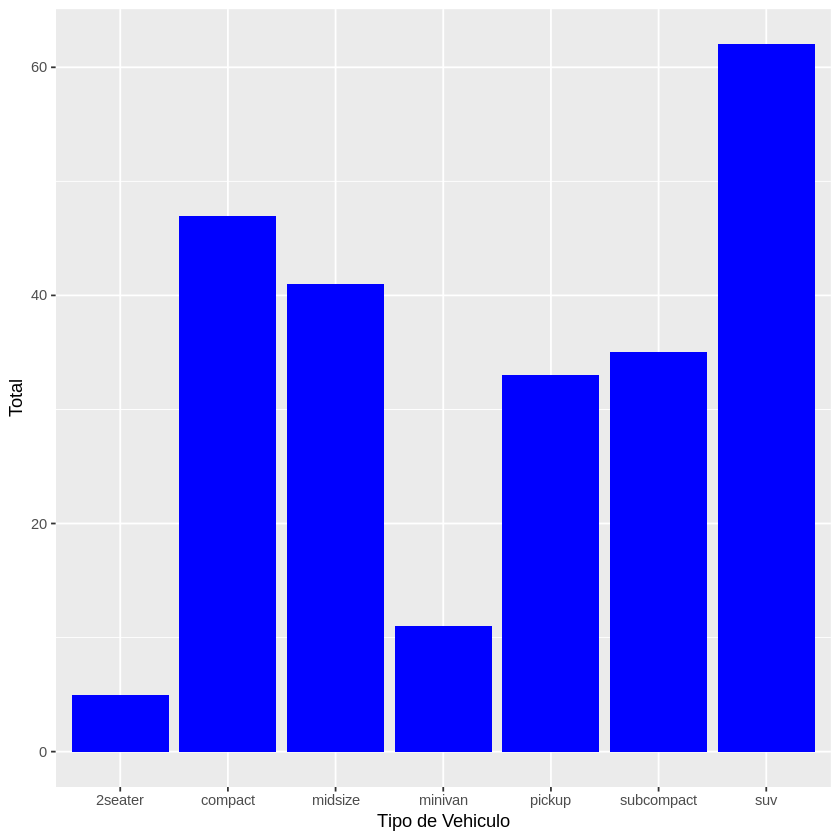

In [ ]:
ggplot(mpg) + #Liezo sin nada
  geom_bar(aes(x = class), fill='blue') + #Agergamos capa 1
  xlab('Tipo de Vehiculo') +
  ylab('Total')

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


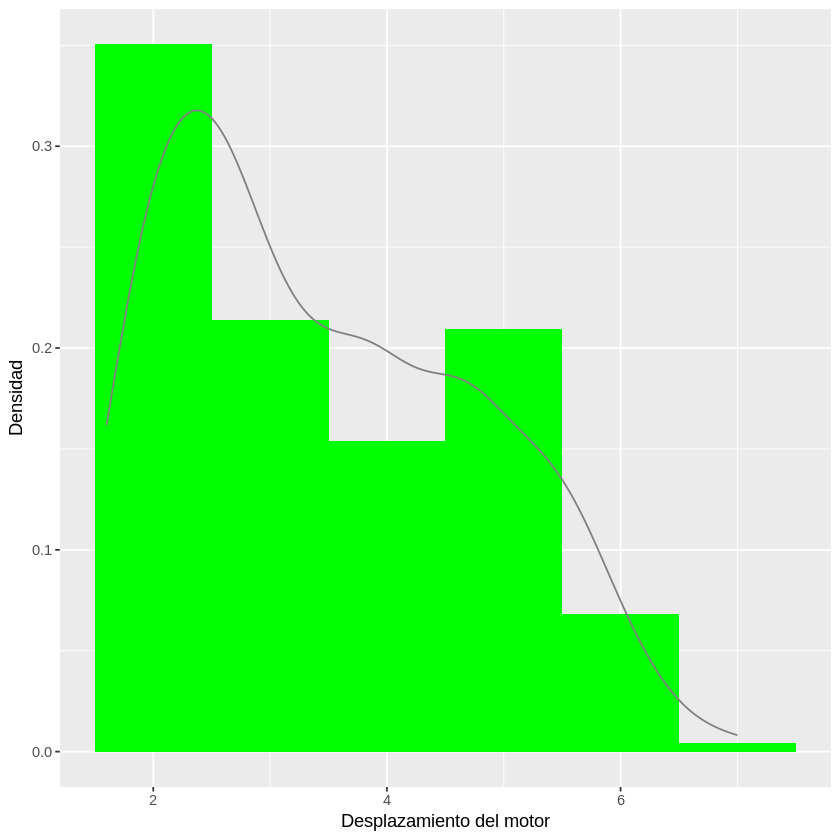

In [ ]:
ggplot(mpg, aes(x = displ)) +
  geom_histogram(aes(y=..density..), binwidth = 1, fill='green') +
  geom_line(stat='density', col ='gray50', size=0.5) +
    ylab('Densidad') +
    xlab('Desplazamiento del motor')

Datos Multivariados

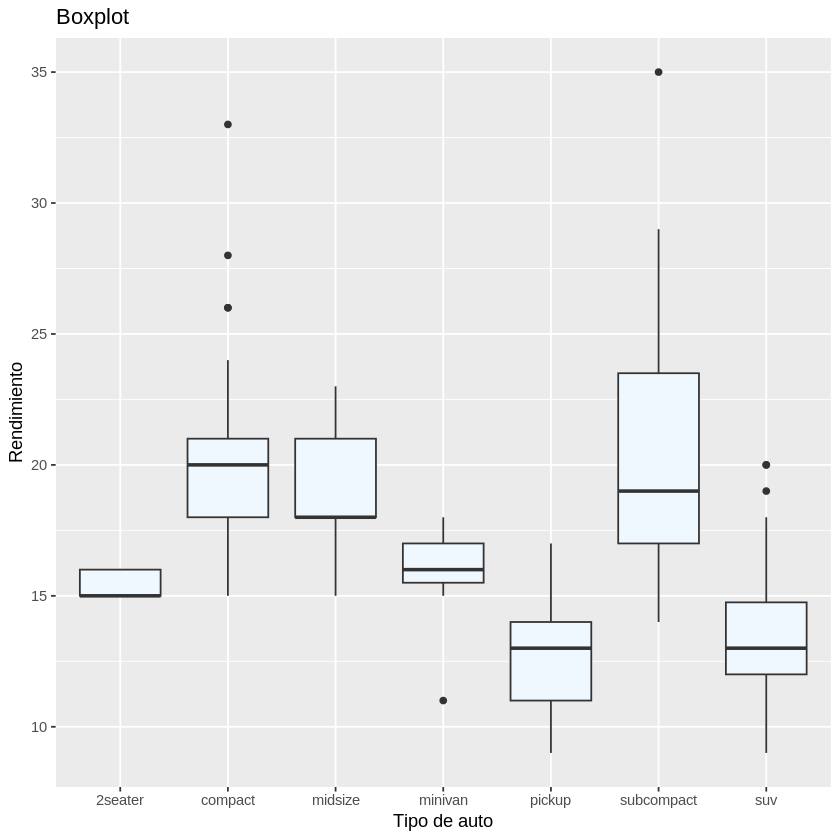

In [ ]:
ggplot(data = mpg, aes(class,cty)) +
  geom_boxplot(fill='aliceblue') +
  labs(title = 'Boxplot', x='Tipo de auto', y='Rendimiento')

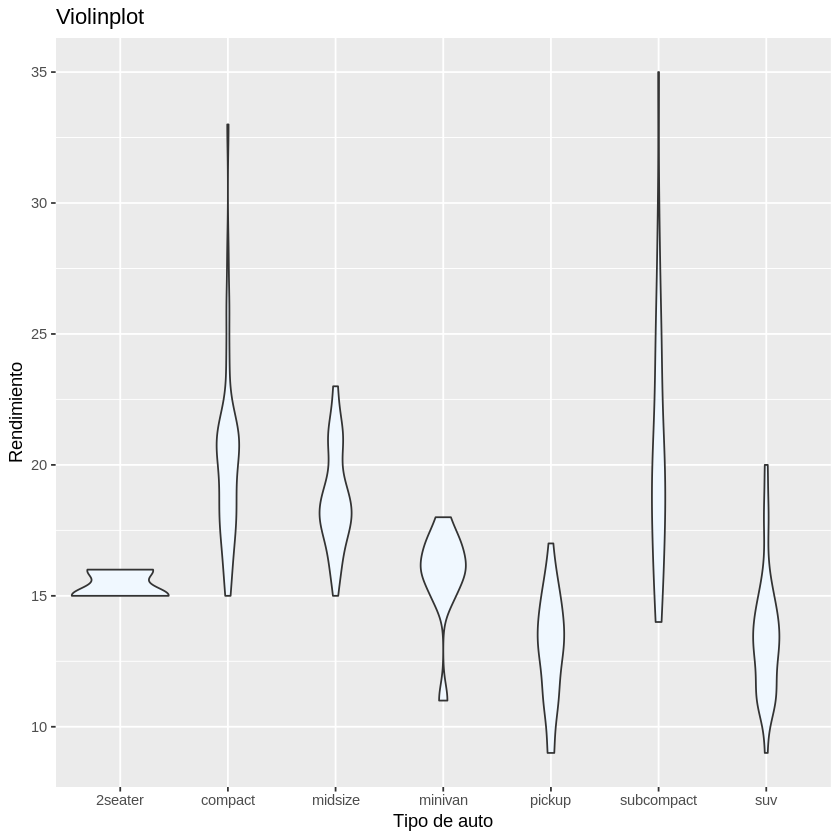

In [ ]:
ggplot(data = mpg, aes(class,cty)) +
  geom_violin(fill='aliceblue') +
  labs(title = 'Violinplot', x='Tipo de auto', y='Rendimiento')

In [ ]:
library(tidyverse) #Permite usar 'pipes'  %>% para secuenciaas de acciones
mpg_summary <- mpg %>%
  group_by(class) %>%
  summarize(mean_cty =  mean(cty),
            std_cty = sd(cty),
            N_cty = n(),
            se = std_cty/sqrt(N_cty),
            x_max = mean_cty + se,
            x_min = mean_cty - se
)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
mpg_summary$class <- reorder(mpg_summary$class, mpg_summary$mean_cty)
mpg_summary

class,mean_cty,std_cty,N_cty,se,x_max,x_min
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2seater,15.40000,0.5477226,5,0.2449490,15.64495,15.15505
compact,20.12766,3.3854999,47,0.4938259,20.62149,19.63383
midsize,18.75610,1.9465416,41,0.3039987,19.06010,18.45210
minivan,15.81818,1.8340219,11,0.5529784,16.37116,15.26520
pickup,13.00000,2.0463382,33,0.3562218,13.35622,12.64378
subcompact,20.37143,4.6023377,35,0.7779371,21.14937,19.59349
suv,13.50000,2.4208791,62,0.3074520,13.80745,13.19255


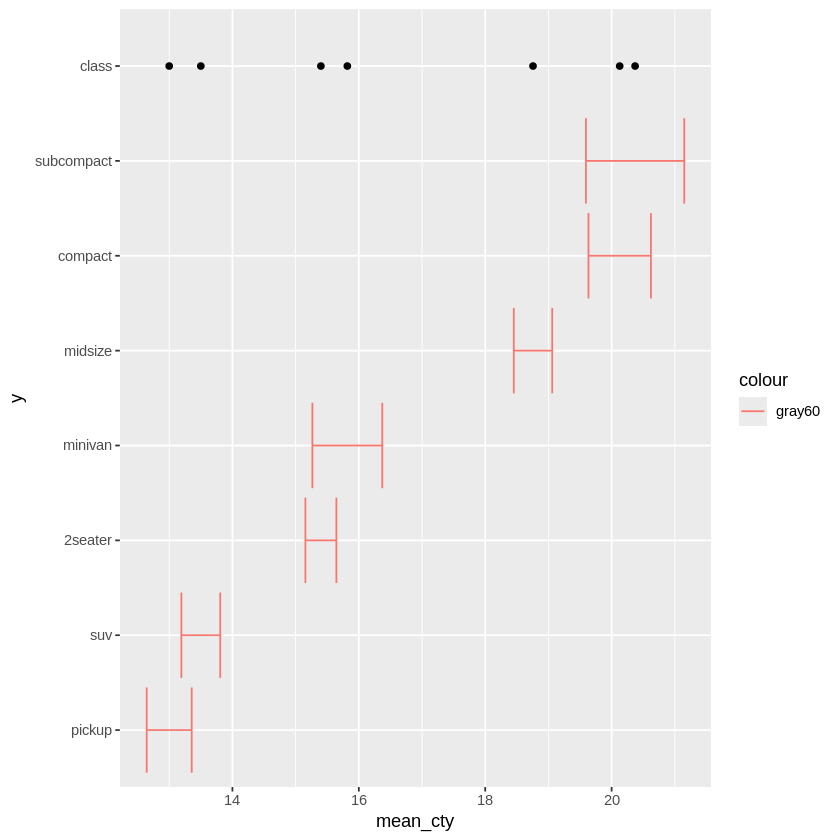

In [ ]:
ggplot(mpg_summary,aes(mean_cty, y= 'class')) +
  geom_errorbar(aes(mean_cty, xmax=x_max, xmin=x_min, y=class,color='gray60'))+
  geom_point(col='black')

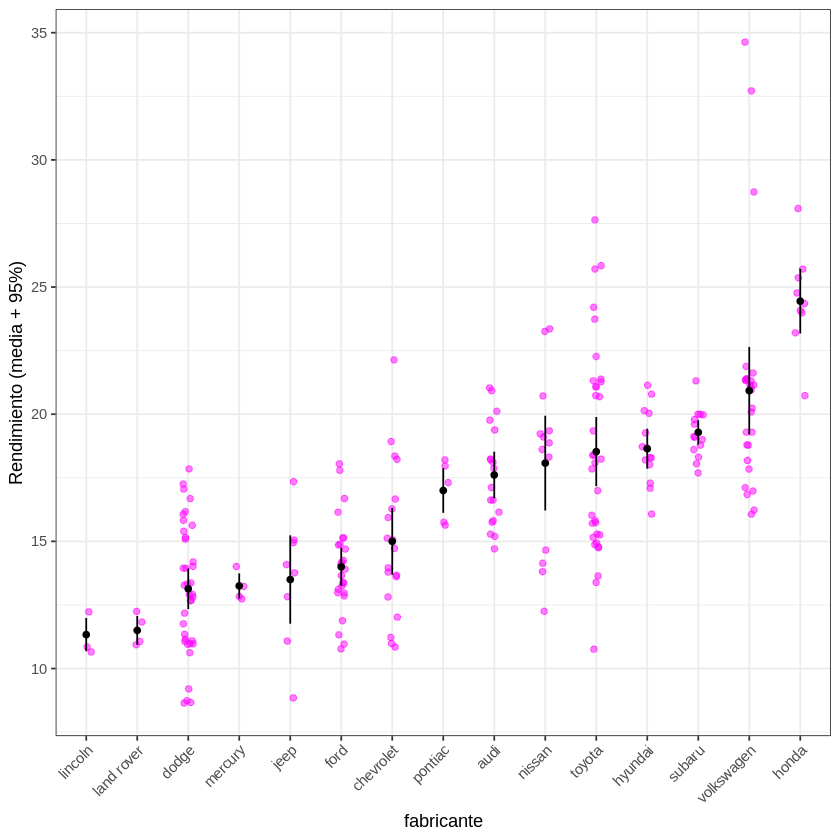

In [ ]:
ggplot(mpg, aes(x=reorder(manufacturer, cty, FUN = mean), y = cty)) +
  geom_jitter(colour='#FF00FF', alpha=0.5, width = 0.1) +
  geom_point(stat = 'summary', fun = 'mean') +
  geom_errorbar(stat = 'summary', fun.data = 'mean_se',
                fun.args = list(mult=1.96), width=0) +
  labs(x='fabricante', y='Rendimiento (media + 95%)') +
  theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

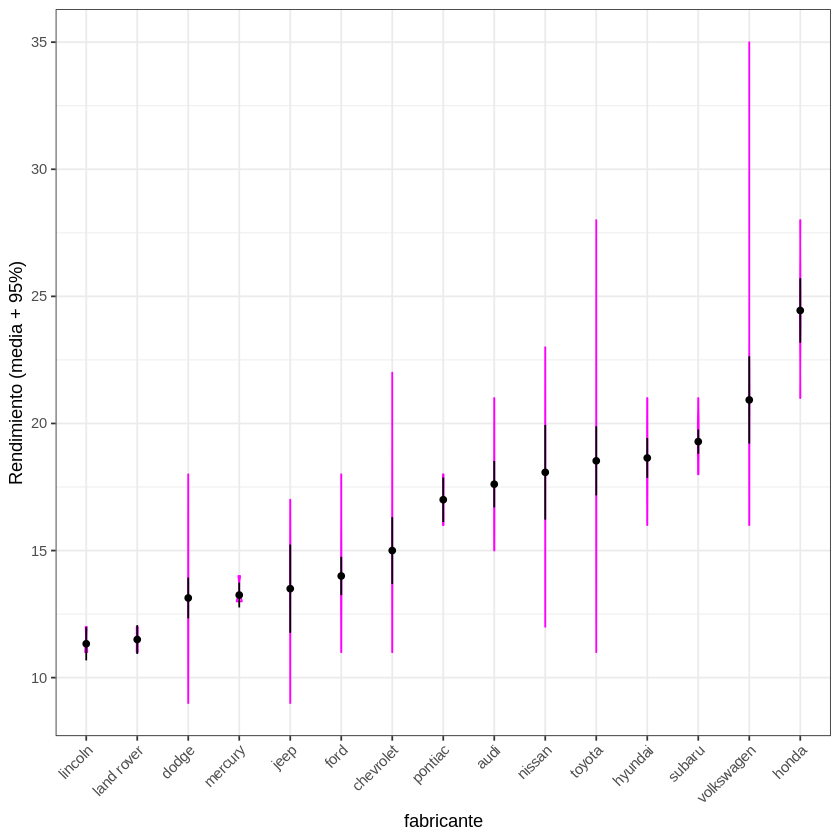

In [ ]:
ggplot(mpg, aes(x=reorder(manufacturer, cty, FUN = mean), y = cty)) +
  geom_violin(colour='#FF00FF', alpha=0.5, width = 0.1) +
  geom_point(stat = 'summary', fun = 'mean') +
  geom_errorbar(stat = 'summary', fun.data = 'mean_se',
                fun.args = list(mult=1.96), width=0) +
  labs(x='fabricante', y='Rendimiento (media + 95%)') +
  theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

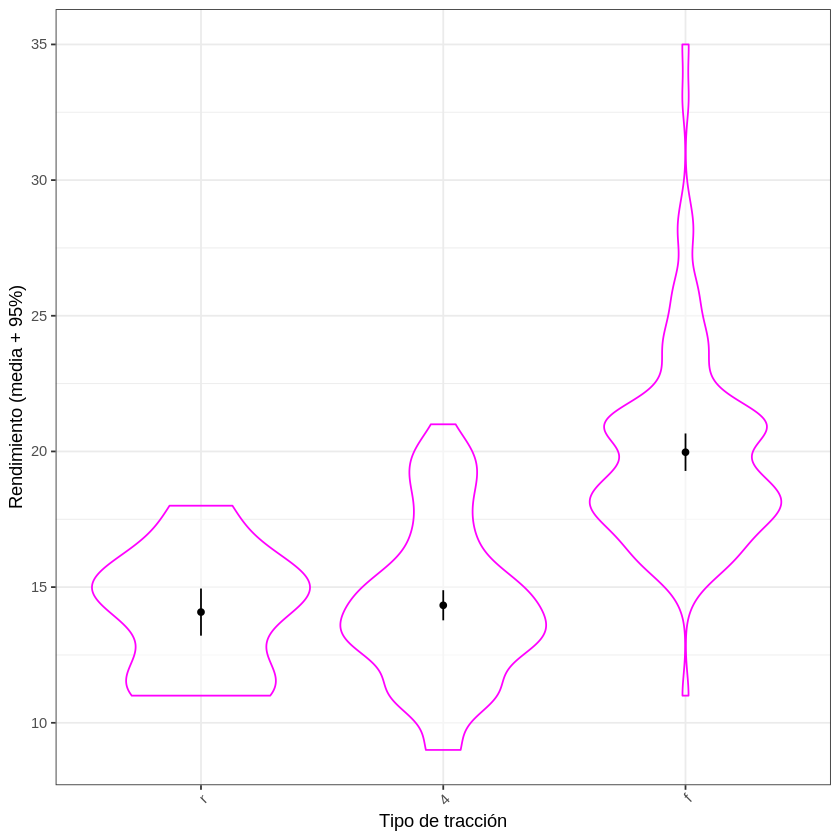

In [ ]:
ggplot(mpg, aes(x=reorder(drv, cty, FUN = mean), y = cty)) +
  geom_violin(colour='#FF00FF', alpha=0.5) + # , width = 0.1
  geom_point(stat = 'summary', fun = 'mean') +
  geom_errorbar(stat = 'summary', fun.data = 'mean_se',
                fun.args = list(mult=1.96), width=0) +
  labs(x='Tipo de tracción', y='Rendimiento (media + 95%)') +
  theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
set.seed(3939394)
data <- mpg[sample.int(nrow(mpg), size = 200, replace = F),]
#Reordenamiento
data$manufacturer <- reorder(data$manufacturer, data$cty)

In [ ]:
medianas <- aggregate(data$displ, list(data$manufacturer), FUN = median)
names(medianas) <- c('manufacturer', 'displ')
medianas$y_val <- as.numeric(medianas$manufacturer)
head(medianas)

,manufacturer,displ,y_val
,<fct>,<dbl>,<dbl>
1,lincoln,5.4,1
2,land rover,4.3,2
3,dodge,4.7,3
4,mercury,4.0,4
5,ford,4.6,5
6,jeep,4.2,6


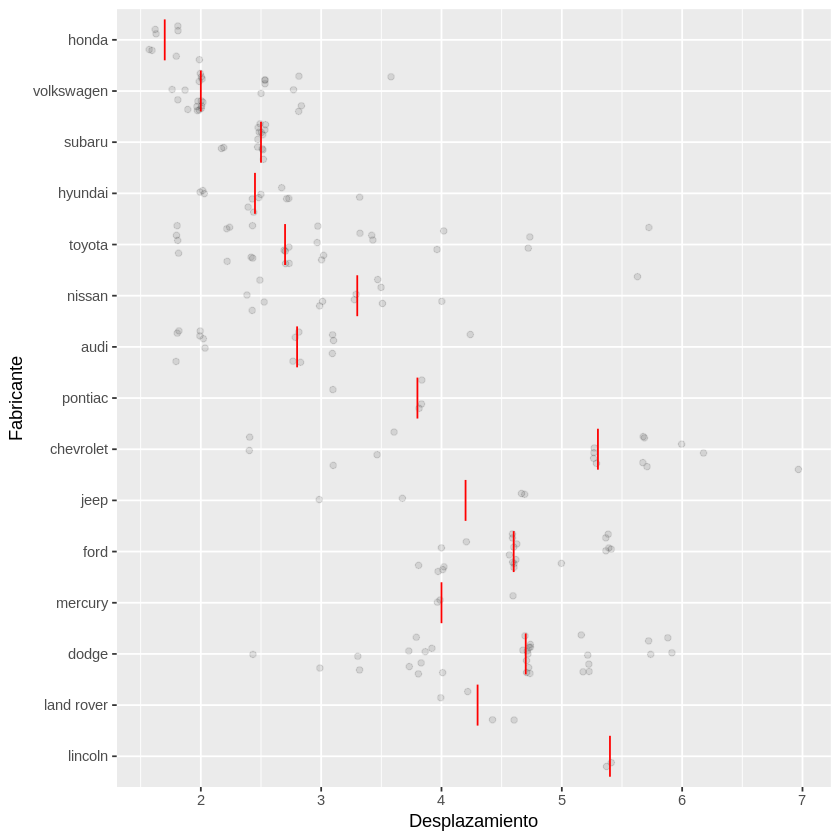

In [ ]:
ggplot(data, aes(x=displ, y = manufacturer)) +
  geom_point(position = position_jitter(h=.4), alpha=0.1) +
    geom_segment(data=medianas, col = 'red',
                 aes(x=displ, xend = displ,
                 y=y_val-.4, yend=y_val+.4)) +
    labs(x='Desplazamiento', y='Fabricante')

In [ ]:
medianas <- aggregate(data$displ,
                      list(drv = data$drv,
                           manufacturer = data$manufacturer),
                      FUN = median)
names(medianas) <- c('drv', 'manufacturer', 'displ')
medianas$y_val <- as.numeric(medianas$manufacturer)
jit_val <- 0.6
head(medianas)

,drv,manufacturer,displ,y_val
,<chr>,<fct>,<dbl>,<dbl>
1,r,lincoln,5.40,1
2,4,land rover,4.30,2
3,4,dodge,4.70,3
4,f,dodge,3.55,3
5,4,mercury,4.00,4
6,4,ford,4.60,5


In [1]:
ggplot(data, aes(x=displ, y = manufacturer, group = drv, col = drv)) +
  geom_point(position = position_jitter(h=jit_val), alpha=0.1) +
    geom_segment(data=medianas,
                 aes(x=displ, xend = displ, group=drv, col = drv,
                 y=y_val-jit_val, yend=y_val+jit_val)) +
    labs(x='Desplazamiento', y='Fabricante')

SyntaxError: invalid syntax (4139053674.py, line 1)